In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 3.1 Problem- 1: Getting Started with Data Exploration- Some Warm up
#  Exercises:
#  1. Data Exploration and Understanding:
#  • Dataset Overview:
#  1. Load the dataset and display the first 10 rows.
import pandas as pd
whr=pd.read_csv("/content/drive/MyDrive/Python_dataset/WHR-2024-5CS037.csv")
whr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [46]:
rows, columns = whr.shape
print(f"Number of rows: {rows},\nNumber of columns: {columns}")

Number of rows: 143,
Number of columns: 9


In [47]:
whr.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [48]:
scr_mean=whr["score"].mean()
scr_median=whr["score"].median()
scr_sd=whr["score"].std()
print(f"Mean: {scr_mean}, Median: {scr_median}, Standard Deviation: {scr_sd}")

Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [49]:
high_score=whr.loc[whr["score"].idxmax(),"Country name"]
low_score=whr.loc[whr["score"].idxmin(),"Country name"]
print("Highest Happiness Score Country: ",high_score)
print("Lowest Happiness Score Country: ",low_score)

Highest Happiness Score Country:  Finland
Lowest Happiness Score Country:  Afghanistan


In [50]:
miss_value=whr.isnull().sum()
miss_value[miss_value>0]

,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [51]:
filter=whr[whr["score"]>7.5]
filter

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [52]:
sort_gdp=filter.sort_values(by="Log GDP per capita", ascending=False)
sort_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [53]:
def col_happiness(score):
  if score<4:
    return "Low"
  elif score>=4 and score<=6:
    return "Medium"
  else:
    return "High"
whr["Happiness_Category"]=whr["score"].apply(col_happiness)
whr.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


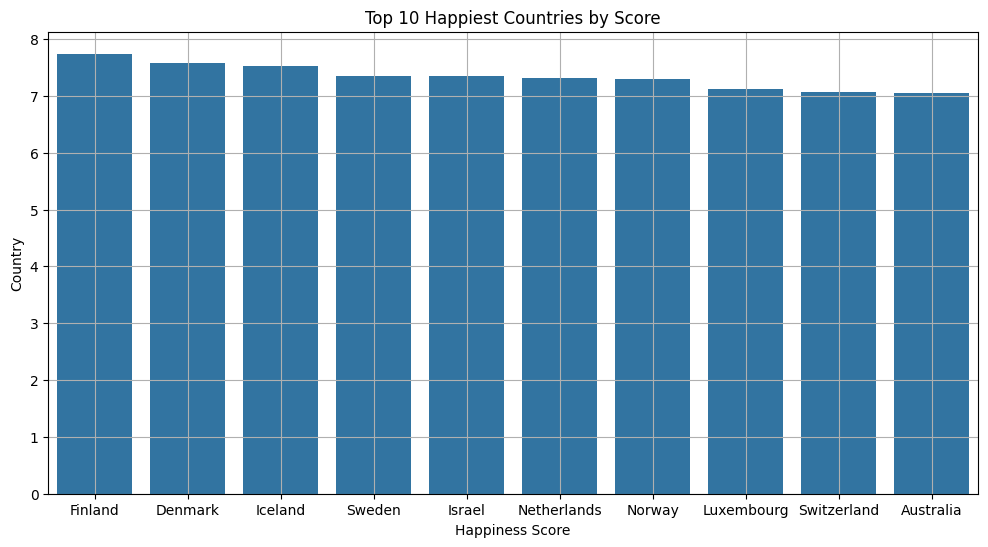

In [54]:
#2. Data VIsualizations:
# Bar Plot: plot the top 10 happiest countries by score using a bar chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr=pd.read_csv("/content/drive/MyDrive/Python_dataset/WHR-2024-5CS037.csv")

happiest=whr.sort_values(by="score", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=happiest, x="Country name", y="score")
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.grid()
plt.show()

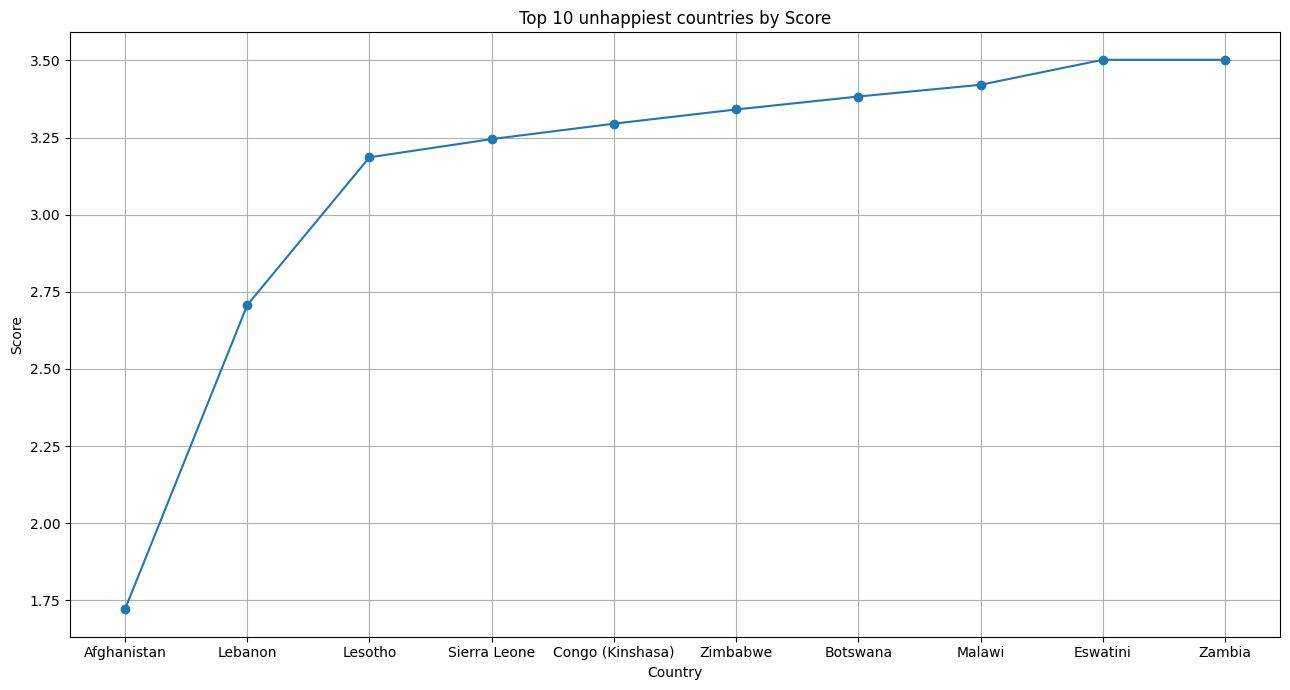

In [55]:
#Line Plot: plot the top 10 unhappiest countries by Score using a line chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr=pd.read_csv("/content/drive/MyDrive/Python_dataset/WHR-2024-5CS037.csv")

unhappiest=whr.sort_values(by="score", ascending=True).head(10)

plt.figure(figsize=(13,7))
plt.plot(unhappiest["Country name"], unhappiest["score"], marker="o")
plt.title("Top 10 unhappiest countries by Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.tight_layout()
plt.grid()
plt.show()

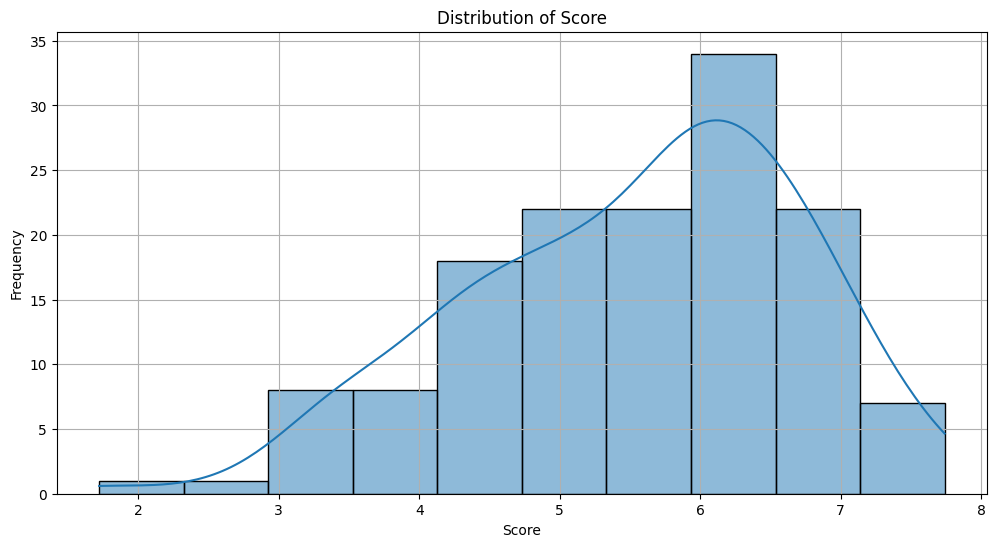

In [56]:
# plot a histogram for the score column to show its distribution and also interpret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr=pd.read_csv("/content/drive/MyDrive/Python_dataset/WHR-2024-5CS037.csv")

plt.figure(figsize=(12,6))
sns.histplot(whr["score"], kde=True)
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

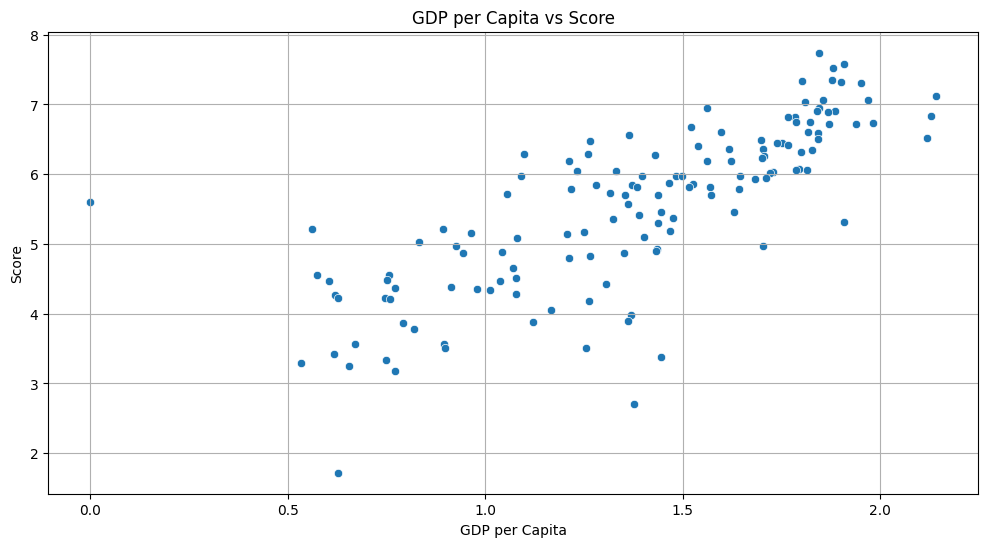

In [57]:
# Scatter plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr=pd.read_csv("/content/drive/MyDrive/Python_dataset/WHR-2024-5CS037.csv")

plt.figure(figsize=(12,6))
sns.scatterplot(data=whr, x="Log GDP per capita", y="score")
plt.title("GDP per Capita vs Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.grid()
plt.show()

In [58]:
#Problem 2 Some Advance Data Exploration Task
#Task 1 setup task Preparing the south asia dataset
# 1. Define the countries in South Asia with a list for example:
#  south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
#  "Maldives", "Nepal", "Pakistan", "Srilanka"]
sAsian_countries=["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Srilanka"]

#  2. Use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.
sAsian_df = whr[whr['Country name'].isin(sAsian_countries)]
print(sAsian_df)

#  3. Save the filtered dataframe as separate CSV files for future use.
sAsian_df.to_csv("sAsia_Coutries.csv",index=False)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-59-da99f0e5b9dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sAsian_df["Composite Score"]=(0.40*sAsian_df["Log GDP per capita"]+0.30*sAsian_df["Social support"]+0.30*sAsian_df["Healthy life expectancy"])


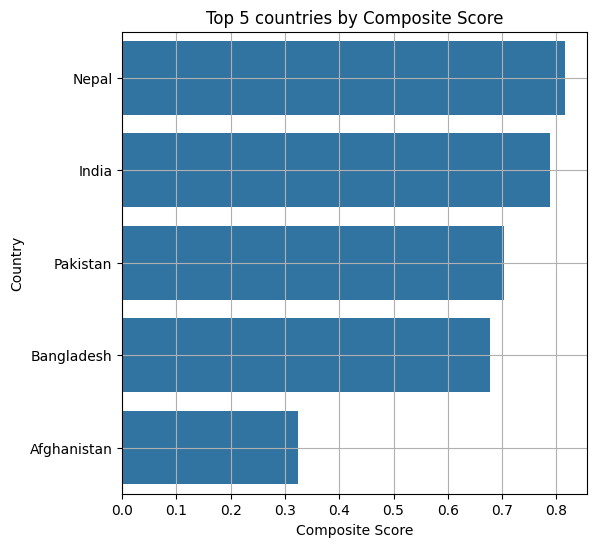

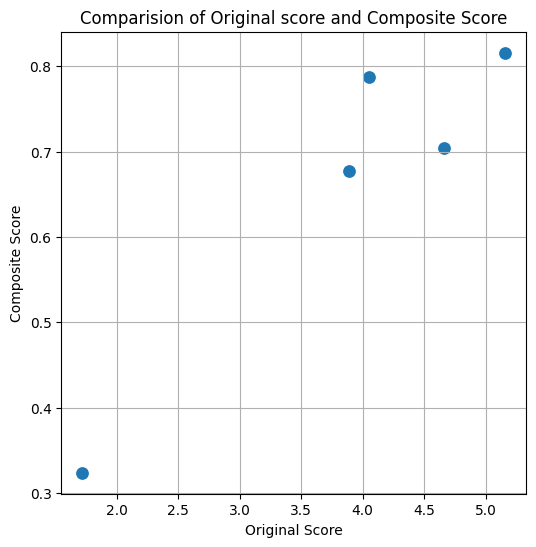

In [59]:
#Task 2 Composite Score Ranking
#1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
#  following metrics:
#  Composite Score = 0.40×GDP per Capita+0.30×Social Support +0.30 ×Healthy Life Expectancy
sAsian_df["Composite Score"]=(0.40*sAsian_df["Log GDP per capita"]+0.30*sAsian_df["Social support"]+0.30*sAsian_df["Healthy life expectancy"])

#2. Rank the South Asian countries based on the Composite Score in descending order
sAsian_df=sAsian_df.sort_values(by="Composite Score", ascending=False)
print(sAsian_df[["Country name", "Composite Score"]])

#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top=sAsian_df.head(5)

plt.figure(figsize=(6,6))
sns.barplot(data=top, x="Composite Score", y="Country name")
plt.title("Top 5 countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.grid()
plt.show()

#4. Discuss whether the ranking based on the Composite Score align with the Original Score - support your discussion with some visualization plot
plt.figure(figsize=(6,6))
sns.scatterplot(data=sAsian_df, x="score", y="Composite Score",s=100)
plt.title("Comparision of Original score and Composite Score")
plt.xlabel("Original Score")
plt.ylabel("Composite Score")
plt.grid()
plt.show()

In [60]:
#Task 3 Outlier Detection
#1. Identify outlier countries in South Asia based on their Score and GDP per Capita
#2. Define outliers using the 1.5 * IQR rule
def check(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

gdp_outliers = check(sAsian_df, 'Log GDP per capita')
score_outliers = check(sAsian_df, 'score')

outliers = pd.concat([gdp_outliers, score_outliers]).drop_duplicates()
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,0.3238


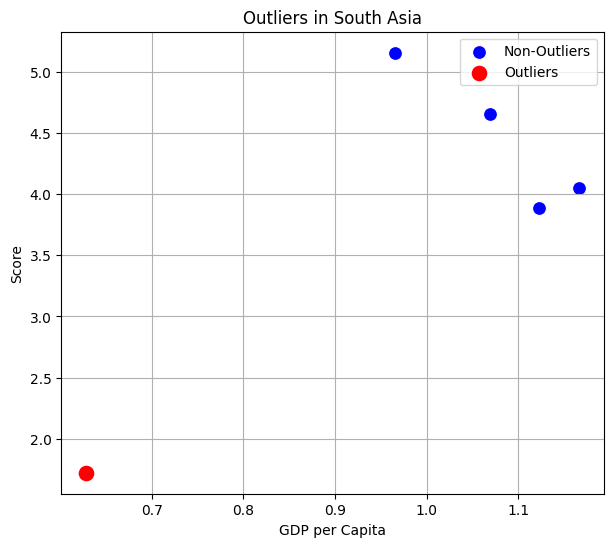

In [61]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=sAsian_df, x="Log GDP per capita", y="score", label="Non-Outliers", color="blue", s=100)
sns.scatterplot(data=outliers,x="Log GDP per capita", y="score",label="Outliers",color="red",s=150)
plt.title("Outliers in South Asia")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

In [62]:
#Task 4 Exploring Trends Across Metrics
#1. Choose two metrics (eg. Freedom to Make life choices and generosity) and calculate their correlation (person correlation) with the score for the south asian countries
correlation=sAsian_df["Freedom to make life choices"].corr(sAsian_df["score"])
generosity=sAsian_df["Generosity"].corr(sAsian_df["score"])

print("Freedom Correlation: ",correlation)
print("Generosity Correlation: ",generosity)

Freedom Correlation:  0.801497903141921
Generosity Correlation:  0.8773326267276359


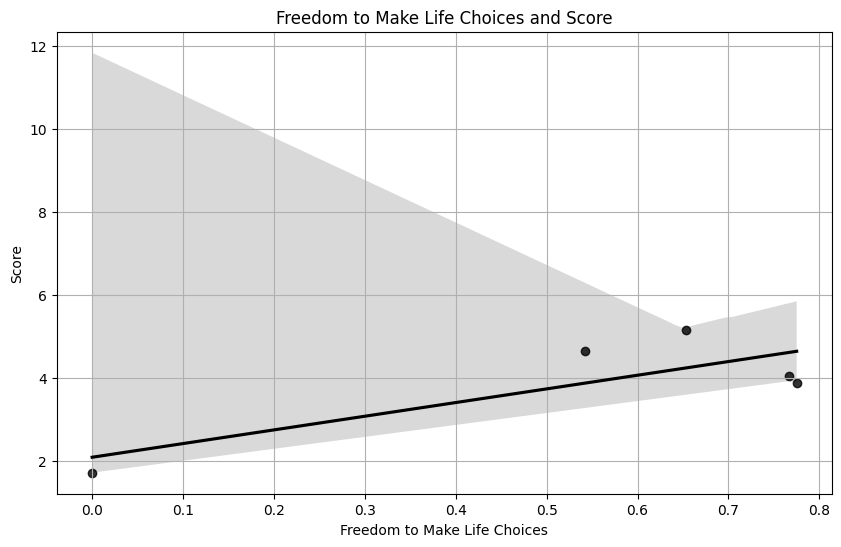

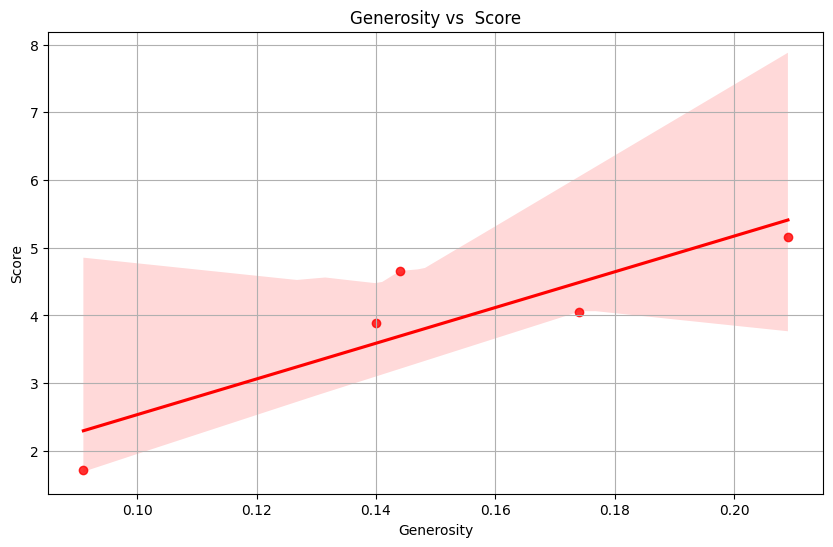

In [63]:
plt.figure(figsize=(10,6))
sns.regplot(data=sAsian_df, x="Freedom to make life choices", y="score", color="black" )
plt.title("Freedom to Make Life Choices and Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=sAsian_df, x='Generosity', y='score', color='red')
plt.title('Generosity vs  Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid()
plt.show()

In [64]:
# Task 5 Gap Analysis
#1. Add a new column GDP-Score Gap, which is the difference betwen GDP per Capita and the score for each south asian country
sAsian_df=pd.read_csv("/content/sAsia_Coutries.csv")
sAsian_df["GDP-Score Gap"]=sAsian_df["Log GDP per capita"]-sAsian_df["score"]

#2. Rank the south asian countries by this gap in both ascending and descending order.
scoreGap_asc=sAsian_df.sort_values(by="GDP-Score Gap",ascending=True)
scoreGap_desc=sAsian_df.sort_values(by="GDP-Score Gap",ascending=False)

asc=scoreGap_asc[["Country name","GDP-Score Gap"]].head(3)
print(asc)
desc=scoreGap_desc[["Country name","GDP-Score Gap"]].head(3)
print(desc)

  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
  Country name  GDP-Score Gap
4  Afghanistan         -1.093
3   Bangladesh         -2.764
2        India         -2.888


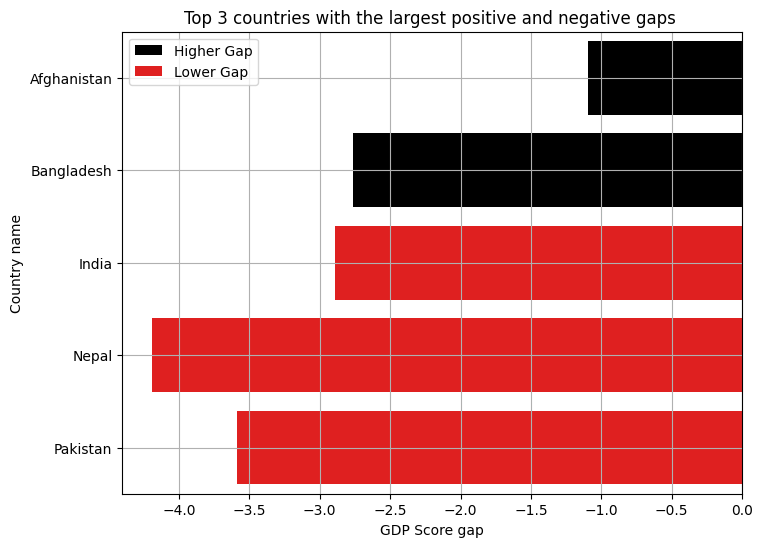

In [65]:
highgap=scoreGap_desc.head(3)
lowgap=scoreGap_asc.head(3)

plt.figure(figsize=(8,6))
sns.barplot(data=highgap, x="GDP-Score Gap", y="Country name",color="Black",label="Higher Gap")
sns.barplot(data=lowgap, x="GDP-Score Gap", y="Country name",color="red",label="Lower Gap")
plt.title("Top 3 countries with the largest positive and negative gaps ")
plt.xlabel("GDP Score gap")
plt.ylabel("Country name")
plt.grid()
plt.legend()
plt.show()

In [66]:
#Problem 3 Comparative Analysis
#Task 1 setup task preparing the middle eastern dataset
#1. similar in task 1 of problem 2 create a dataframe from middle eastern countries. For hint use the following list
middle_east_countries=[ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
midEast_df = whr[whr['Country name'].isin(middle_east_countries)]
midEast_df.to_csv("midEast_Countries.csv",index=False)
midEast_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [67]:
#1. Descriptive Statistics
#Calculate the mean standard deviation of the score for both south asia and middle east
#which region has higher happiness Scores on average
sAsia_mean=sAsian_df["score"].mean()
midEast_mean=midEast_df["score"].mean()

sAsia_std=sAsian_df["score"].std()
midEast_std=midEast_df["score"].std()

print(f"\nSouth Asia \n Mean: {sAsia_mean} \n Standard Deviation: {sAsia_std}")
print(f"\nMiddle East \n Mean: {midEast_mean} \n Standard Deviation: {midEast_std}")

if sAsia_mean>midEast_mean:
  print("South Asia has higher average happiness score")
else:
  print("Middle East has higher average happiness score")


South Asia 
 Mean: 3.8952000000000004 
 Standard Deviation: 1.3160025455902433

Middle East 
 Mean: 5.412100000000001 
 Standard Deviation: 1.5662011684327144
Middle East has higher average happiness score


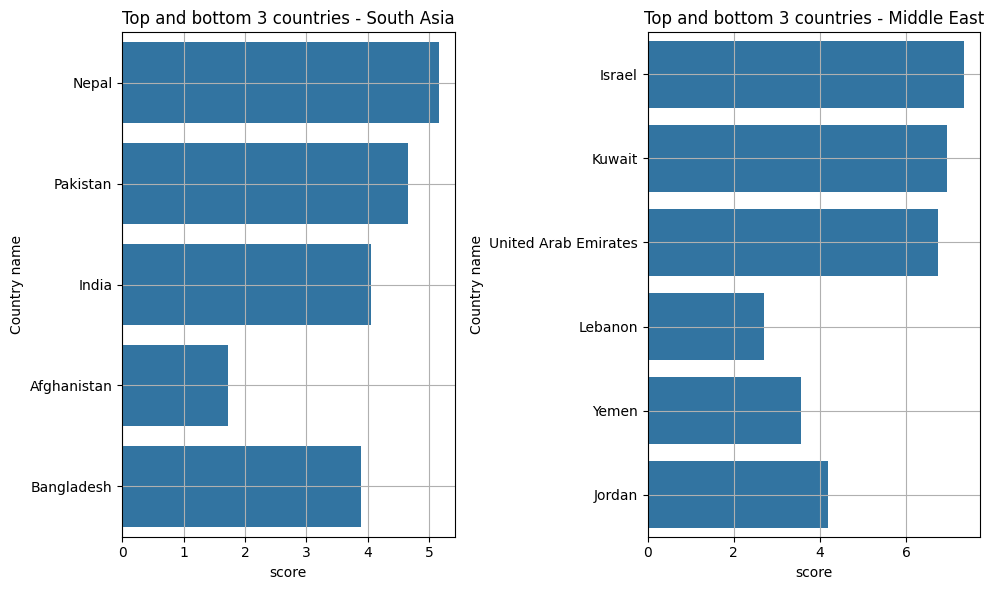

In [76]:
#2. Top and Buttom Performers:
#Identify the top 3 and bottom 3 countries in each region based on the score.
# Plot bar charts comparing these charts.
sAsia_top=sAsian_df.nlargest(3,"score")
midEast_top=midEast_df.nlargest(3,"score")

sAsia_bottom=sAsian_df.nsmallest(3,"score")
midEast_bottom=midEast_df.nsmallest(3,"score")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x="score",y="Country name",data=pd.concat([sAsia_top, sAsia_bottom]))
plt.title("Top and bottom 3 countries - South Asia")
plt.grid()

plt.subplot(1,2,2)
sns.barplot(x="score",y="Country name",data=pd.concat([midEast_top, midEast_bottom]))
plt.title("Top and bottom 3 countries - Middle East")

plt.grid()
plt.tight_layout()
plt.show()

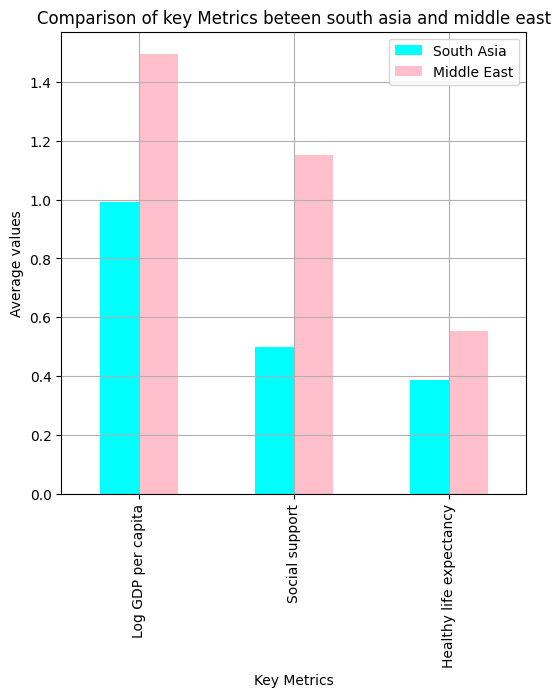

In [69]:
# 3. Metric Comparisons:
# Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
# Which metrics show the largest disparity between the two regions?
comp=["Log GDP per capita", "Social support", "Healthy life expectancy"]

sAsia_mean_pick=sAsian_df[comp].mean()
midEast_mean_pick=midEast_df[comp].mean()

comp_df=pd.DataFrame({"South Asia":sAsia_mean_pick,"Middle East":midEast_mean_pick})

comp_df.plot(kind="bar", figsize=(6,6), color=["cyan","pink"])
plt.title("Comparison of key Metrics beteen south asia and middle east")
plt.ylabel("Average values")
plt.xlabel("Key Metrics")
plt.grid()
plt.legend()
plt.show()

In [70]:
# 4. Happiness Disparity:
# Compute the range (max- min) and coefficient of variation (CV) for Score in both regions.
# Which region has greater variability in happiness?
def compt(df,clmn):
  range=df[clmn].max()-df[clmn].min()
  cv=df[clmn].std()/df[clmn].mean()
  return range, cv

sAsian_range, sAsian_cv = compt(sAsian_df, 'score')
midEast_range, midEast_cv = compt(midEast_df, 'score')

print(f"\nSouth Asia \n Range: {sAsian_range} \n CV: {sAsian_cv}")
print(f"\nMiddle East \n Range: {midEast_range} \n CV: {midEast_cv}")

if sAsian_cv>midEast_cv:
  print("\n South Asia has greater variability in happiness")
else:
  print("\n Middle East has greater variability in happiness")


South Asia 
 Range: 3.4370000000000003 
 CV: 0.3378523684509764

Middle East 
 Range: 4.634 
 CV: 0.28938880812119405

 South Asia has greater variability in happiness


Correlation of Score with Freedom to make life choices
South Asia: 0.801497903141921
Middle East: 0.8632202433827544
Correlation of Score with Generosity
South Asia: 0.8773326267276358
Middle East: 0.6275236536964182


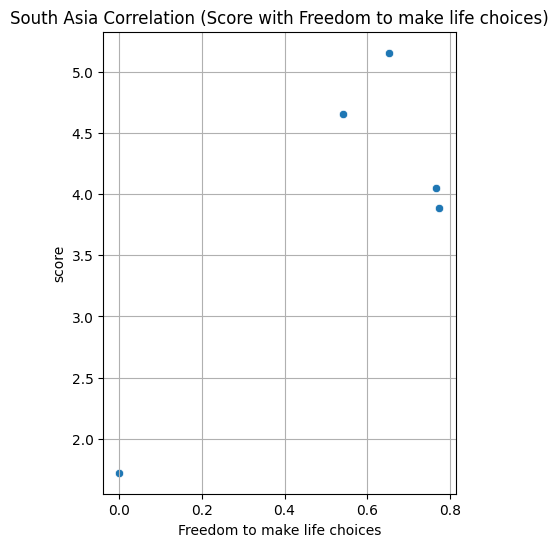

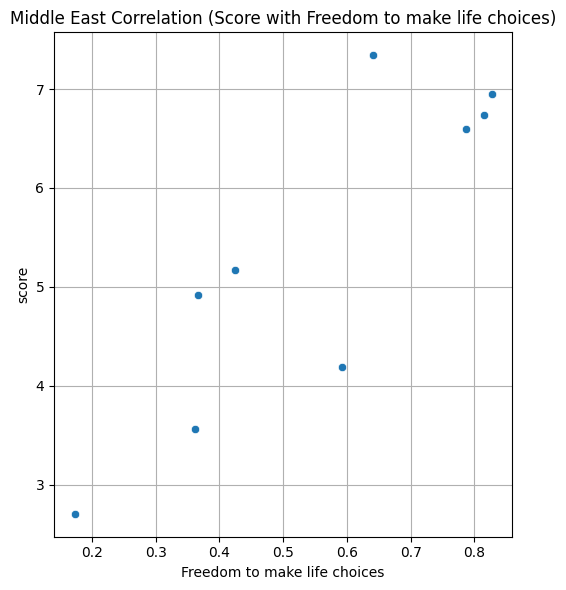

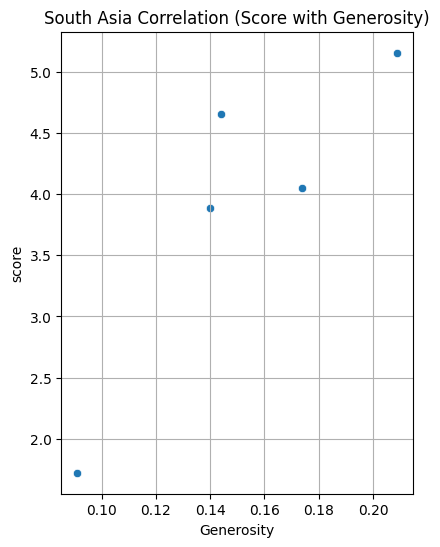

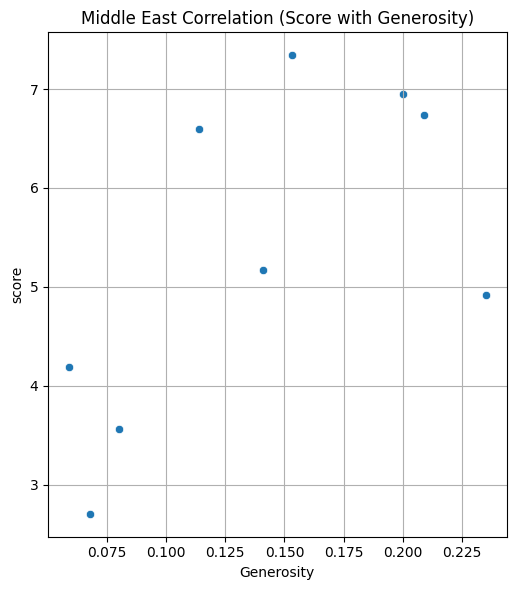

In [75]:
# 5. Correlation Analysis:
# Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
# Create scatter plots to visualize and interpret the relationships.
metrics=["Freedom to make life choices","Generosity"]

for m in metrics:
  print(f"Correlation of Score with {m}")
  print("South Asia:", sAsian_df['score'].corr(sAsian_df[m]))
  print("Middle East:", midEast_df['score'].corr(midEast_df[m]))

for m in metrics:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.scatterplot(x=m, y="score",data=sAsian_df)
  plt.title(f"South Asia Correlation (Score with {m})")
  plt.grid()

  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.scatterplot(x=m, y="score",data=midEast_df)
  plt.title(f"Middle East Correlation (Score with {m})")

  plt.tight_layout()
  plt.grid()
  plt.show()

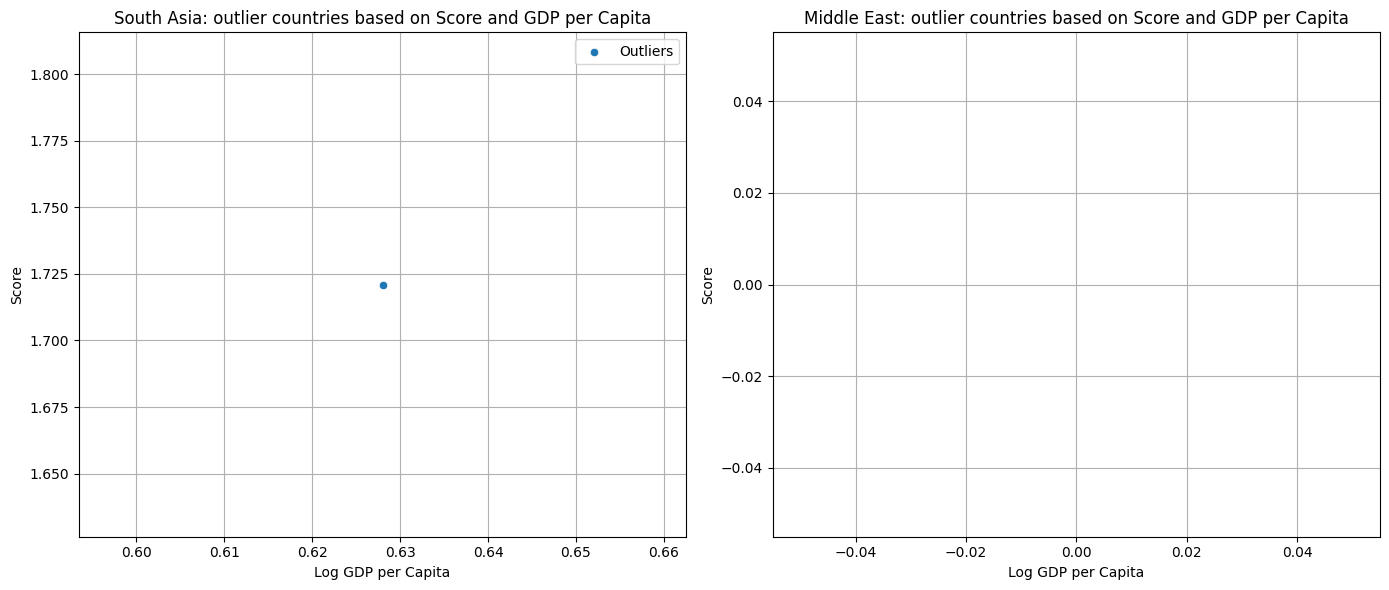

In [74]:
#6. Outlier Detection:
# Identify outlier countries in both regions based on Score and GDP per Capita.
# Plot these outliers and discuss their implications.
def outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

sAsian_out_score=outlier(sAsian_df,"score")
midEast_out_score=outlier(midEast_df,"score")

sAsian_out_gdp=outlier(sAsian_df,"score")
midEast_out_gdp=outlier(midEast_df,"score")

sAsian_outliers=pd.concat([sAsian_out_score,sAsian_out_gdp]).drop_duplicates()
midEast_outliers=pd.concat([midEast_out_score,midEast_out_gdp]).drop_duplicates()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=sAsian_outliers, x='Log GDP per capita', y='score', label='Outliers')
plt.title("South Asia: outlier countries based on Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(data=midEast_outliers, x='Log GDP per capita', y='score', label='Outliers')
plt.title("Middle East: outlier countries based on Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")

plt.grid()
plt.tight_layout()
plt.show()



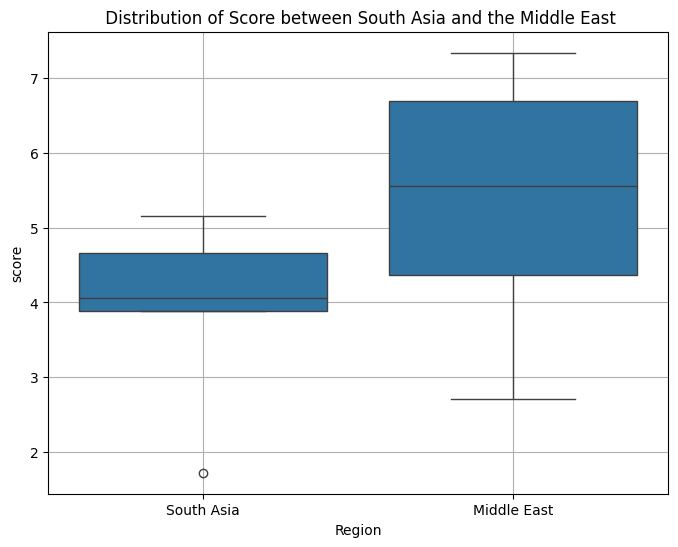

In [73]:
#7. Visualization:
#Create boxplots comparing the distribution of Score between South Asia and the Middle East.
#Interpret the key differences in distribution shapes, medians, and outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score',data=pd.concat([sAsian_df.assign(Region="South Asia"),midEast_df.assign(Region="Middle East")]))
plt.grid()
plt.title(" Distribution of Score between South Asia and the Middle East")
plt.show()